In [12]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 640.0 kB/s eta 0:03:16
   ---------------------------------------- 0.2/124.9 MB 2.4 MB/s eta 0:00:53
   ---------------------------------------- 0.5/124.9 MB 4.2 MB/s eta 0:00:30
   ---------------------------------------- 1.1/124.9 MB 6.3 MB/s eta 0:00:20
    --------------------------------------- 1.7/124.9 MB 7.9 MB/s eta 0:00:16
    --------------------------------------- 2.3/124.9 MB 8.7 MB/s eta 0:00:15
    --------------------------------------- 2.9/124.9 MB 9.1 MB/s eta 0:00:14
   - -------------------------------------- 3.7/124.9 MB 10.3 MB/s eta 0:00:12
   - -------------------------------------- 4.2/124.9 MB 11.1 MB/s eta 0:00:11
   - -------------------------------------- 4.8/124.9 MB 10.9 MB/s eta 0:00:12
   - -------------------------------------- 5.5/124.9 MB 11.4 MB/s eta 0:00:11
   - -------------------------------------- 6.2/124.9 MB 11.7 MB/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("merged_data2.csv")
df

,State,year,month,PRCP,EVAP,TMIN,TMAX,mean_elevation,Land Area (sq mi),Water Area (sq mi),Total Area (sq mi),Percentage of Federal Land,Urbanization Rate (%),t2m,d2m,u10,v10,lai_hv,lai_lv,total_fire_size
0,AL,1992,1,45.1800,18.290000,-28.000000,217.000000,150,50645,1775,52420,0.027,57.7,280.50504,275.98972,0.348443,-0.406506,2.619983,2.017871,48.0000
1,AL,1992,2,35.2000,25.850000,-39.000000,256.000000,150,50645,1775,52420,0.027,57.7,284.18732,279.35610,-0.045184,-0.028213,2.722013,2.040723,241.8000
2,AL,1992,3,21.8500,38.960000,-39.000000,278.000000,150,50645,1775,52420,0.027,57.7,286.06583,279.84326,0.469903,0.196084,3.121278,2.120171,92.7000
3,AL,1992,4,17.5100,50.480000,-33.000000,317.000000,150,50645,1775,52420,0.027,57.7,289.99915,283.59494,0.047251,0.169923,3.961650,2.271143,610.4000
4,AL,1992,5,15.4400,60.040000,39.000000,328.000000,150,50645,1775,52420,0.027,57.7,294.23640,286.02148,-0.043767,-0.388255,4.453578,2.353044,204.9000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9282,WY,2010,7,21.4832,50.844623,6.613593,329.797053,2040,97093,720,97813,0.467,62.0,292.77360,277.38600,0.932594,0.452818,1.644510,0.938712,9067.6792
9283,WY,2010,8,21.4832,50.844623,6.613593,329.797053,2040,97093,720,97813,0.467,62.0,292.42004,276.59134,1.209483,1.063112,1.608641,0.914595,15647.3300
9284,WY,2010,9,21.4832,50.844623,6.613593,329.797053,2040,97093,720,97813,0.467,62.0,287.70602,271.88812,1.376941,0.642834,1.554814,0.891072,30812.7500
9285,WY,2010,10,21.4832,50.844623,6.613593,329.797053,2040,97093,720,97813,0.467,62.0,281.65510,272.06305,1.440961,0.482671,1.505095,0.863013,29693.1900


In [5]:
df = df.drop(["State","year"],axis=1)

In [10]:
df

,month,PRCP,EVAP,TMIN,TMAX,mean_elevation,Land Area (sq mi),Water Area (sq mi),Total Area (sq mi),Percentage of Federal Land,Urbanization Rate (%),t2m,d2m,u10,v10,lai_hv,lai_lv,total_fire_size
0,1,45.1800,18.290000,-28.000000,217.000000,150,50645,1775,52420,0.027,57.7,280.50504,275.98972,0.348443,-0.406506,2.619983,2.017871,48.0000
1,2,35.2000,25.850000,-39.000000,256.000000,150,50645,1775,52420,0.027,57.7,284.18732,279.35610,-0.045184,-0.028213,2.722013,2.040723,241.8000
2,3,21.8500,38.960000,-39.000000,278.000000,150,50645,1775,52420,0.027,57.7,286.06583,279.84326,0.469903,0.196084,3.121278,2.120171,92.7000
3,4,17.5100,50.480000,-33.000000,317.000000,150,50645,1775,52420,0.027,57.7,289.99915,283.59494,0.047251,0.169923,3.961650,2.271143,610.4000
4,5,15.4400,60.040000,39.000000,328.000000,150,50645,1775,52420,0.027,57.7,294.23640,286.02148,-0.043767,-0.388255,4.453578,2.353044,204.9000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9282,7,21.4832,50.844623,6.613593,329.797053,2040,97093,720,97813,0.467,62.0,292.77360,277.38600,0.932594,0.452818,1.644510,0.938712,9067.6792
9283,8,21.4832,50.844623,6.613593,329.797053,2040,97093,720,97813,0.467,62.0,292.42004,276.59134,1.209483,1.063112,1.608641,0.914595,15647.3300
9284,9,21.4832,50.844623,6.613593,329.797053,2040,97093,720,97813,0.467,62.0,287.70602,271.88812,1.376941,0.642834,1.554814,0.891072,30812.7500
9285,10,21.4832,50.844623,6.613593,329.797053,2040,97093,720,97813,0.467,62.0,281.65510,272.06305,1.440961,0.482671,1.505095,0.863013,29693.1900


In [7]:
# Define the ordered categories (assuming months are numbers 1 to 12)
month_categories = list(range(1, 13))

# Convert the 'month' column to an ordered categorical type without renaming
df['month'] = pd.Categorical(df['month'], categories=month_categories, ordered=True)

In [14]:
target = 'total_fire_size'

X = df.drop(columns = [target])
y = df[target]

In [15]:
X

,month,PRCP,EVAP,TMIN,TMAX,mean_elevation,Land Area (sq mi),Water Area (sq mi),Total Area (sq mi),Percentage of Federal Land,Urbanization Rate (%),t2m,d2m,u10,v10,lai_hv,lai_lv
0,1,45.1800,18.290000,-28.000000,217.000000,150,50645,1775,52420,0.027,57.7,280.50504,275.98972,0.348443,-0.406506,2.619983,2.017871
1,2,35.2000,25.850000,-39.000000,256.000000,150,50645,1775,52420,0.027,57.7,284.18732,279.35610,-0.045184,-0.028213,2.722013,2.040723
2,3,21.8500,38.960000,-39.000000,278.000000,150,50645,1775,52420,0.027,57.7,286.06583,279.84326,0.469903,0.196084,3.121278,2.120171
3,4,17.5100,50.480000,-33.000000,317.000000,150,50645,1775,52420,0.027,57.7,289.99915,283.59494,0.047251,0.169923,3.961650,2.271143
4,5,15.4400,60.040000,39.000000,328.000000,150,50645,1775,52420,0.027,57.7,294.23640,286.02148,-0.043767,-0.388255,4.453578,2.353044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9282,7,21.4832,50.844623,6.613593,329.797053,2040,97093,720,97813,0.467,62.0,292.77360,277.38600,0.932594,0.452818,1.644510,0.938712
9283,8,21.4832,50.844623,6.613593,329.797053,2040,97093,720,97813,0.467,62.0,292.42004,276.59134,1.209483,1.063112,1.608641,0.914595
9284,9,21.4832,50.844623,6.613593,329.797053,2040,97093,720,97813,0.467,62.0,287.70602,271.88812,1.376941,0.642834,1.554814,0.891072
9285,10,21.4832,50.844623,6.613593,329.797053,2040,97093,720,97813,0.467,62.0,281.65510,272.06305,1.440961,0.482671,1.505095,0.863013


In [16]:
y

0          48.0000
1         241.8000
2          92.7000
3         610.4000
4         204.9000
           ...    
9282     9067.6792
9283    15647.3300
9284    30812.7500
9285    29693.1900
9286     1269.9500
Name: total_fire_size, Length: 9287, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale everything except year, month, and state
X_scaled = X.copy()
columns_to_scale = X_scaled.columns.difference(['month'])  # Add 'year' and 'state' if necessary
X_scaled[columns_to_scale] = scaler.fit_transform(X_scaled[columns_to_scale])

# Split the data into training and testing sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

c:\Users\Kira\anaconda3\envs\block_c\lib\site-packages\xgboost\core.py:158: UserWarning: [15:10:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "lambda_" } are not used.

  warnings.warn(smsg, UserWarning)


Mean Squared Error: 7635907106.355863


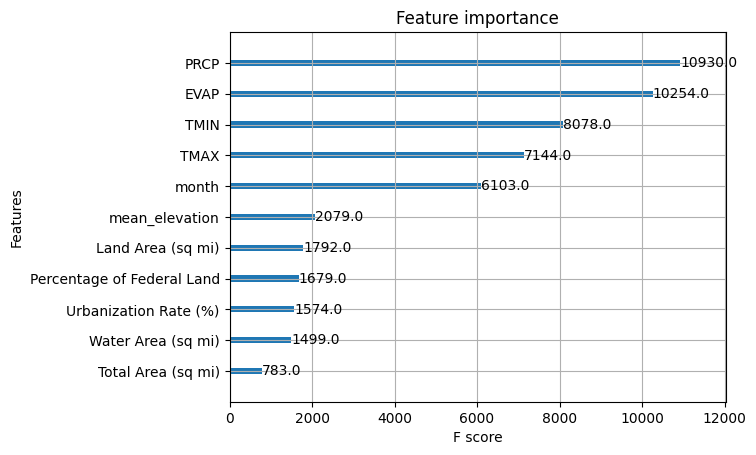

In [ ]:
# Initialize the XGBoost model with parameters
model = xgb.XGBRegressor(
    objective='reg:squarederror',   # For regression tasks
    booster='gbtree',               # Tree-based model
    learning_rate=0.1,              # Controls the step size at each iteration
    n_estimators=1000,              # Number of boosting rounds
    max_depth=6,                    # Maximum depth of each tree
    min_child_weight=1,             # Minimum sum of instance weight (hessian) needed in a child
    gamma=0,                        # Minimum loss reduction required to make a further partition
    subsample=0.8,                  # Fraction of samples used for training each tree
    colsample_bytree=0.8,           # Fraction of features used for each tree
    lambda_=1,                      # L2 regularization term on weights
    alpha=0,                        # L1 regularization term on weights
    scale_pos_weight=1,             # Balances positive/negative class weights (useful for imbalanced data)
    random_state=42,
    enable_categorical = True
)

# Train the model
model.fit(X_train_1, y_train_1, eval_set=[(X_test_1, y_test_1)], verbose=False)

# Predict the target values
y_pred = model.predict(X_test_1)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test_1, y_pred)
print(f"Mean Squared Error: {mse}")

# Optionally: Plot the feature importances
import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.show()

In [ ]:
# Build a simple neural network model
model_1 = keras.Sequential([
    layers.Dense(2048, activation='relu', input_shape=(X_train_1.shape[1],)),
    layers.Dense(2048, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='linear'),
    layers.Dense(1)
])

# Compile the model with RMSE as the optimization metric
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

model_1.compile(optimizer='adam', loss=rmse, metrics=[rmse])

# Define early stopping callback
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model_1.fit(X_train_1, y_train_1, epochs=100, batch_size=16, validation_data=(X_test_1, y_test_1), callbacks=[early_stopping])

# Display the model summary
model_1.summary()

Epoch 1/100
371/371 [==============================] - 4s 8ms/step - loss: 41437.6133 - rmse: 41370.5820 - val_loss: 52763.0469 - val_rmse: 52057.4102
Epoch 2/100
371/371 [==============================] - 3s 7ms/step - loss: 39699.3398 - rmse: 39629.4766 - val_loss: 47378.1445 - val_rmse: 46752.4297
Epoch 3/100
371/371 [==============================] - 3s 7ms/step - loss: 40041.3945 - rmse: 39962.1250 - val_loss: 49298.8438 - val_rmse: 48671.8203
Epoch 4/100
371/371 [==============================] - 3s 7ms/step - loss: 40395.2031 - rmse: 40322.0078 - val_loss: 44104.7617 - val_rmse: 43589.3477
Epoch 5/100
371/371 [==============================] - 2s 6ms/step - loss: 40050.1250 - rmse: 39972.4414 - val_loss: 44367.3906 - val_rmse: 43837.4648
Epoch 6/100
371/371 [==============================] - 2s 7ms/step - loss: 39133.4766 - rmse: 39143.2148 - val_loss: 45876.5117 - val_rmse: 45121.1680
Epoch 7/100
371/371 [==============================] - 3s 7ms/step - loss: 39134.3828 - rmse: 

In [34]:
df_pred = pd.read_csv("final_merged_2011_2015.csv",index_col="ID")
df_pred

,State,month,year,mean_elevation,Land Area (sq mi),Water Area (sq mi),Total Area (sq mi),Percentage of Federal Land,Urbanization Rate (%),PRCP,EVAP,TMIN,TMAX
ID,,,,,,,,,,,,,
0.0,AK,1,2011,580.0,570641.0,94743.0,665384.0,60.9%,64.9,14.508854,26.705987,-12.025478,246.006369
1.0,AK,2,2011,580.0,570641.0,94743.0,665384.0,60.9%,64.9,14.508854,26.705987,-12.025478,246.006369
2.0,AK,3,2011,580.0,570641.0,94743.0,665384.0,60.9%,64.9,14.508854,26.705987,-12.025478,246.006369
3.0,AK,4,2011,580.0,570641.0,94743.0,665384.0,60.9%,64.9,0.000000,48.000000,33.000000,122.000000
4.0,AK,5,2011,580.0,570641.0,94743.0,665384.0,60.9%,64.9,2.970000,45.940000,-33.000000,294.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995.0,WY,8,2015,2040.0,97093.0,720.0,97813.0,46.7%,62.0,5.950000,102.050000,44.000000,344.000000
2996.0,WY,9,2015,2040.0,97093.0,720.0,97813.0,46.7%,62.0,2.450000,103.080000,22.000000,367.000000
2997.0,WY,10,2015,2040.0,97093.0,720.0,97813.0,46.7%,62.0,10.213831,70.208182,1.259740,335.240260


In [35]:
columns = ["State", "year"]
df_pred.drop(columns,axis=1)
df_pred['month'] = pd.Categorical(df_pred['month'], categories=month_categories, ordered=True)
# Convert percentage columns to numerical values
df_pred['Percentage of Federal Land'] = df_pred['Percentage of Federal Land'].str.rstrip('%').astype(float)

# Select features and target variable
features = ['month', 'PRCP', 'EVAP', 'TMIN', 'TMAX', 'mean_elevation',
            'Land Area (sq mi)', 'Water Area (sq mi)', 'Total Area (sq mi)',
            'Percentage of Federal Land', 'Urbanization Rate (%)']

X = df_pred[features]
X_scaled = X.copy()
columns_to_scale = X_scaled.columns.difference(['month'])

X_scaled[columns_to_scale] = scaler.fit_transform(X_scaled[columns_to_scale])
preds = model_1.predict(X_scaled)

94/94 [==============================] - 0s 3ms/step


In [36]:
preds

array([[106669.6   ],
       [ 98219.305 ],
       [ 90526.74  ],
       ...,
       [  6562.3823],
       [  7053.843 ],
       [  7396.786 ]], dtype=float32)

In [37]:
submission = pd.read_csv("data/zero_submission.csv",index_col="ID")
submission["total_fire_size"] = preds

In [38]:
submission.to_csv("submission_3.csv")

In [39]:
submission

,STATE,month,total_fire_size
ID,,,
0,AK,2011-01,106669.601562
1,AK,2011-02,98219.304688
2,AK,2011-03,90526.742188
3,AK,2011-04,55786.628906
4,AK,2011-05,117531.695312
...,...,...,...
2995,WY,2015-08,14047.888672
2996,WY,2015-09,19893.105469
2997,WY,2015-10,6562.382324


In [89]:
df_pred = pd.read_csv("predictions_merged_2.csv",index_col="ID")
columns = ["State", "year"]
df_pred.drop(columns,axis=1)
df_pred['month'] = pd.Categorical(df_pred['month'], categories=month_categories, ordered=True)
# Convert percentage columns to numerical values
df_pred['Percentage of Federal Land'] = df_pred['Percentage of Federal Land'].str.rstrip('%').astype(float)

# Select features and target variable
features = ['month', 'PRCP', 'EVAP', 'TMIN', 'TMAX', 'mean_elevation',
            'Land Area (sq mi)', 'Water Area (sq mi)', 'Total Area (sq mi)',
            'Percentage of Federal Land', 'Urbanization Rate (%)']

X = df_pred[features]
X_scaled = X.copy()
columns_to_scale = X_scaled.columns.difference(['month'])

X_scaled[columns_to_scale] = scaler.fit_transform(X_scaled[columns_to_scale])
preds = model_1.predict(X_scaled)

94/94 [==============================] - 0s 4ms/step


In [90]:
submission = pd.read_csv("data/zero_submission.csv",index_col="ID")
submission["total_fire_size"] = preds
submission.to_csv("submission_2.csv")
submission

,STATE,month,total_fire_size
ID,,,
0,AK,2011-01,282368.562500
1,AK,2011-02,293402.093750
2,AK,2011-03,302529.218750
3,AK,2011-04,4654.888672
4,AK,2011-05,381529.687500
...,...,...,...
2995,WY,2015-08,2730.821289
2996,WY,2015-09,7966.593750
2997,WY,2015-10,202.379120


In [91]:
X_train_1

,month,PRCP,EVAP,TMIN,TMAX,mean_elevation,Land Area (sq mi),Water Area (sq mi),Total Area (sq mi),Percentage of Federal Land,Urbanization Rate (%)
3365,5,-0.536057,0.320837,-0.144393,0.457686,-0.849992,-0.401001,-0.293367,-0.401579,-0.593218,-1.229232
501,6,-0.282149,0.711068,1.289101,0.998007,-0.645541,-0.335190,-0.322884,-0.346779,-0.387848,-1.399427
3908,4,0.111185,-0.421997,-0.901711,-0.737570,0.451060,-0.016061,-0.372806,-0.067766,-0.784260,-0.045605
2091,7,0.249331,0.152146,0.450642,0.719659,-0.567478,-0.543861,-0.367241,-0.540249,-0.755604,-0.184855
2754,8,-0.214355,-0.296429,-0.225535,-0.099009,-0.682714,-0.608012,-0.049162,-0.552255,-0.765156,-2.706833
...,...,...,...,...,...,...,...,...,...,...,...
3772,6,-0.000739,0.441754,0.004365,0.817900,0.060744,-0.116773,-0.278124,-0.144535,-0.650531,-0.973940
5191,5,-0.441401,-0.312495,-0.441911,-0.459223,-0.385331,-0.429066,-0.309255,-0.429031,-0.731724,0.225160
5226,5,0.235261,-0.391133,-0.144393,-0.360983,-0.532164,-0.991767,-0.373855,-0.942854,-0.803364,1.354634
5390,1,-0.917238,-1.302236,-1.347988,-1.179651,-0.812819,-0.618079,-0.256994,-0.591043,-0.621874,-0.440147


In [92]:
pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---- ----------------------------------- 0.2/1.5 MB 3.1 MB/s eta 0:00:01
   ---------------- ----------------------- 0.6/1.5 MB 7.6 MB/s eta 0:00:01
   ------------------------------- -------- 1.2/1.5 MB 9.2 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 8.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [93]:
model_1.save('model_1.keras')